In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import statsmodels.formula.api as sm 


- Stats model is more optimized for insight 
- scikit learn is more optimized for predictions 

In [2]:
df_fish=pd.read_csv("fish.csv")

In [3]:
df_fish.head()

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5


In [4]:
df_motor_insurance = pd.read_csv("SwedishMotorInsurance.csv")

In [5]:
df_motor_insurance.head()

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,1,1,1,1,455.13,108,392491
1,1,1,1,2,69.17,19,46221
2,1,1,1,3,72.88,13,15694
3,1,1,1,4,1292.39,124,422201
4,1,1,1,5,191.01,40,119373


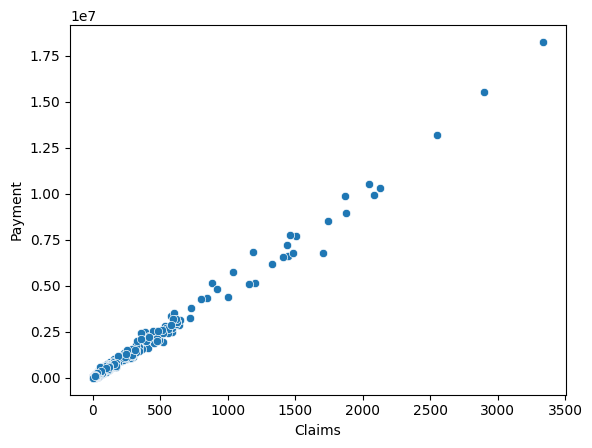

In [6]:
sns.scatterplot(x="Claims",
y="Payment",
data=df_motor_insurance)
plt.show()

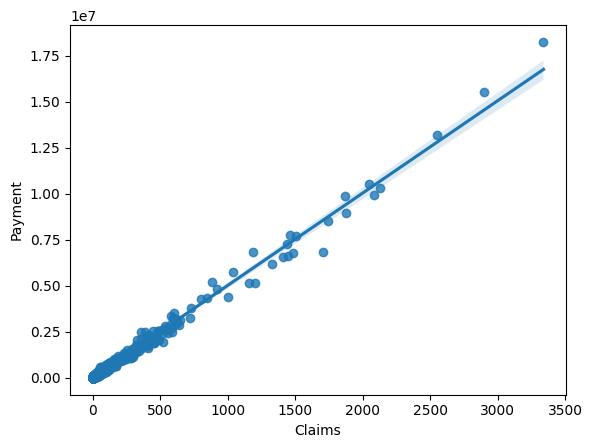

In [7]:
sns.regplot(x="Claims",
y="Payment",
data=df_motor_insurance)
plt.show()

- The confidence interval is  not that very large , that means there is less uncertainty when predicting the payment variable ,ie : **The linear regression is a good fit**

- The confidence interval represent the range of possible values of predictions .
- Also the slope of the line is  high that means there is a strong linear relationship . 




In [8]:
# Okey for now let's explore the taiwan real estate dataset 
df_taiwan =pd.read_csv("taiwan_real_estate2.csv")



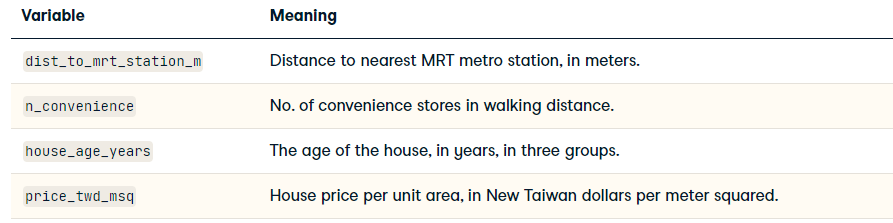

In [9]:
df_taiwan.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


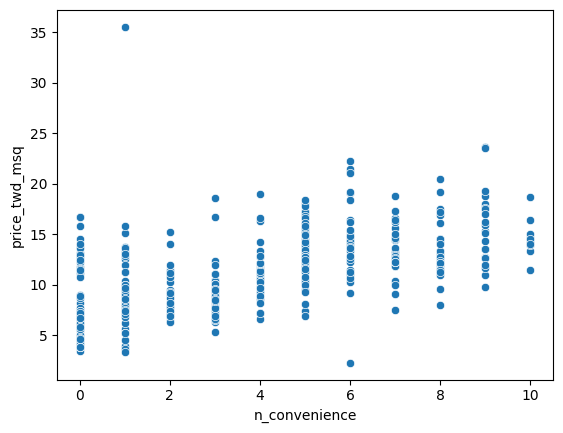

In [10]:
# Draw the scatter plot
sns.scatterplot(x="n_convenience",y="price_twd_msq",data=df_taiwan)

# Show the plot
plt.show()

# the n_convenience is a dummy variable



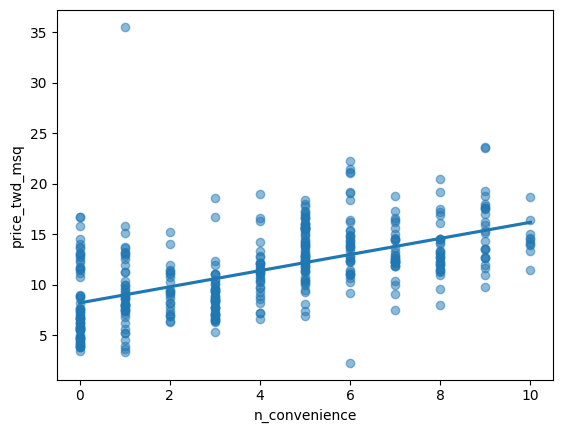

In [11]:
sns.regplot(x="n_convenience",
         y="price_twd_msq",
         data=df_taiwan,
         ci=None,
         scatter_kws={'alpha': 0.5})

# Show the plot, and see the overlapping points 
plt.show()

# Exploring One categorical variable against a quantitative variable  

In [12]:
df_fish.head()

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5


<AxesSubplot: xlabel='species', ylabel='mass_g'>

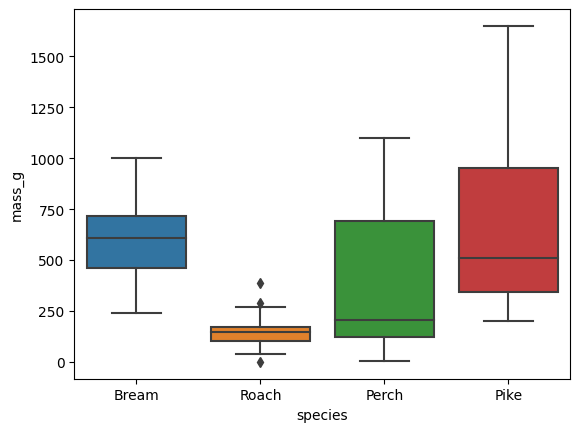

In [13]:
sns.boxplot(data=df_fish,x="species",y="mass_g")

- As we can see there is a significant difference between the distribution of the variable mass_g for each species , for example the group of fish "Bream" is different from "Perch" and also "Pike" .
- Let's visualize it another way 
 

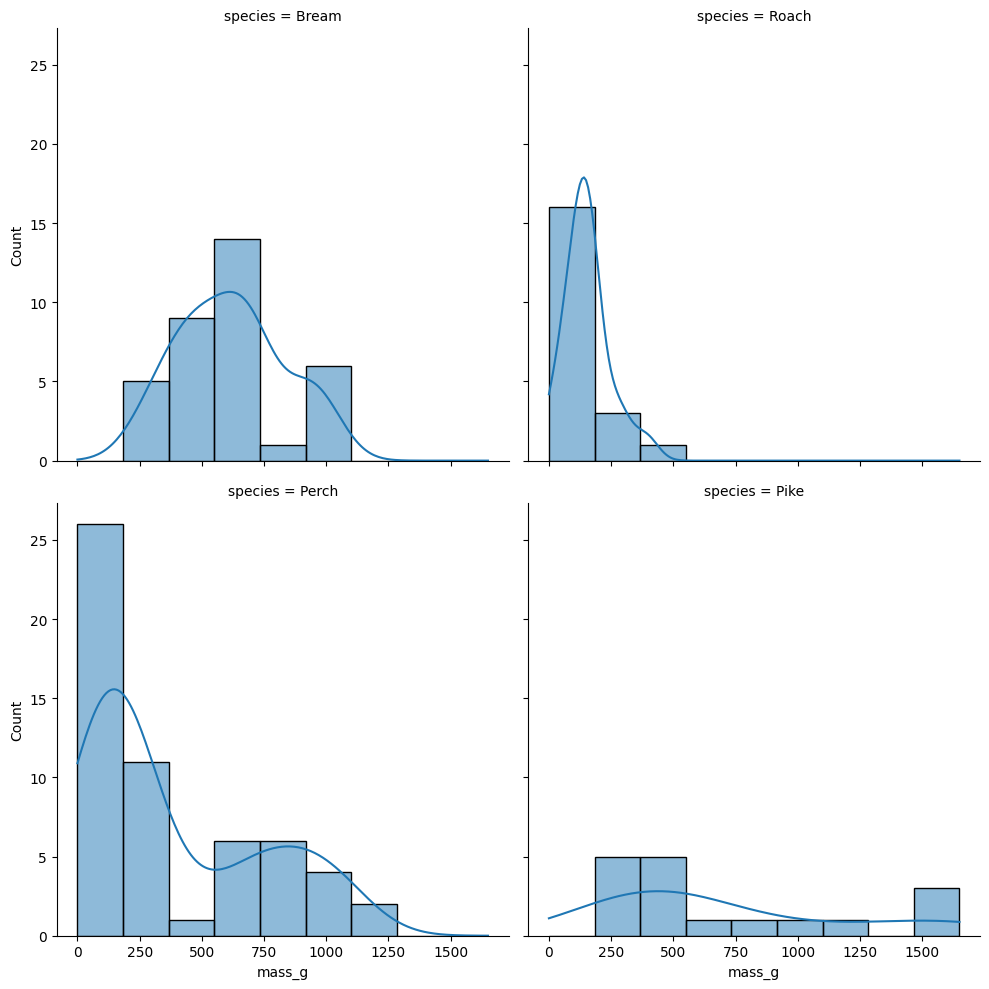

In [30]:
sns.displot(data=df_fish,x="mass_g",col="species",col_wrap=2,kde=True, bins=9)

- From first sight , the distributions are so different  the distribution Perch,Roach are skewed to the right,
- The distribution Bream  , is symmetrical .
- The Pike distribution  is skewed to the right 


### Mean mass for each subgroup 

In [58]:
summary_stats = df_fish.groupby(["species"])["mass_g"].agg(["mean"])

In [59]:
summary_stats

,mean
species,
Bream,617.828571
Perch,382.239286
Pike,718.705882
Roach,152.050000


 #### let's run a linear regression model on  categorical data a:
 - We are going to regress the variable "mass_g" against the categorical  variable "species"  .
 - So the function ols (ordinary least squares )  is going to regress  the column "mass_g" against multiple binary columns  created from the categories in species . 
 - If an observation corrresponds to a category we put 1 , else we put a 0 . 

 - That what we call : <u>One-hot encoding</u> 
 - One-hot encoding is a technique used in machine learning to convert categorical variables into a numerical representation that can be used as input for algorithms that work with numbers, such as linear regression, decision trees, and neural networks.

 - However, one-hot encoding can result in a large number of new columns, especially if the original categorical variable has many unique categories, which can increase the dimensionality of the data and lead to overfitting or reduced performance. To address this issue, you can use techniques such as dimensionality reduction or feature selection to reduce the number of columns generated by one-hot encoding.


In [73]:
#let's create this model 
model_cat = sm.ols("mass_g~species",data=df_fish).fit()

- The coefficients are calculated relative to the intercept (617.82)


In [74]:
print(model_cat.params)

Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64


- The expected value of mass_g is positive (intercept) when none of column of species have the value of 1 .
- The negative coefficients have less weights than the other species  , because it has large negative coefficient .

In [75]:
df_fish[df_fish["species"]=="Pike"]["mass_g"].mean()

718.7058823529412

- As we can see the species "Pike" has a mean of 718.70 in it's mass 
- the intercept represents the average value of the response variable when all of the independent variables are equal to zero. 
- But there is a problem about the intercept , for categories of fishes that are not included in the data  , they will have a mass of 617.82 
which is not true . 
- Some options may be :
     - Ommiting  the intercept . (The coefficiients are calculated relative to 0 )
     - Include a category called "Other" which should be estimated based on data . 
     - Using a decision tree !



In [77]:
#let's ommit the intercept as we don't have the data about other species 

model_without_intercept = sm.ols("mass_g~species+0",data=df_fish).fit()
model_without_intercept.params


species[Bream]    617.828571
species[Perch]    382.239286
species[Pike]     718.705882
species[Roach]    152.050000
dtype: float64

- Remark here that we predict the average value  for each species , because we use here a single categorical variable . 

## Exploring  the taiwan real estate prices dataset 

In [80]:
df_taiwan.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


we have multiple categories of the house  age , we  wanna visualize the relationship between this categorical variable and the price 

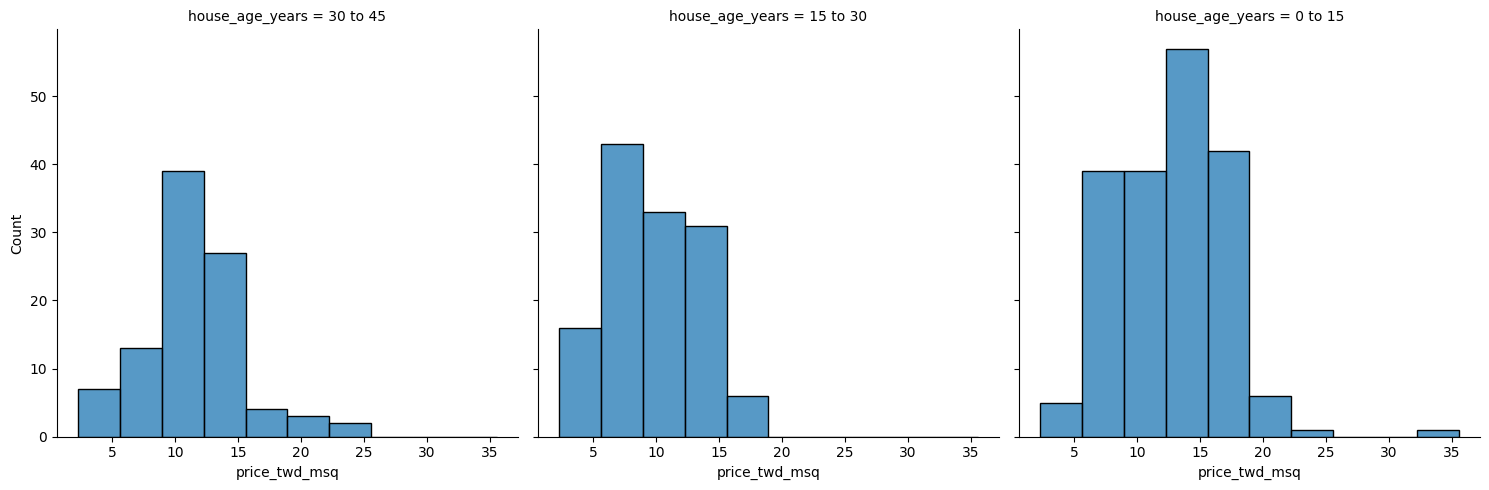

In [88]:
sns.displot(data=df_taiwan,x="price_twd_msq",col="house_age_years",col_wrap=3,bins=10)




- As you can see on average , recent houses have higher prices .
- The shape of distributions of the prices of these categorries are almost the same 

<AxesSubplot: xlabel='house_age_years', ylabel='price_twd_msq'>

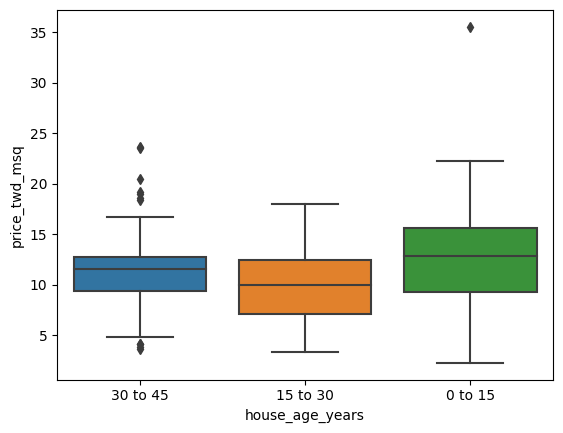

In [89]:
sns.boxplot(data=df_taiwan,y="price_twd_msq",x="house_age_years")

- The older houses have  many outliers . 

- A good way to explore categorical variables further is to calculate summary statistics for each category. For example, you can calculate the mean and median of your response variable, grouped by a categorical variable. As such, you can compare each category in more detail.

In [91]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = df_taiwan.groupby("house_age_years")["price_twd_msq"].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [93]:
#Create a linear regression model 
mdl_price_vs_age = sm.ols("price_twd_msq ~ house_age_years", data=df_taiwan).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [95]:
#for a category that doesn't belong to the categories in the data , it'll have a price  of on average  12.63
# let's ommit this intercept 
# 
# # Update the model formula to remove the intercept
mdl_price_vs_age0 = sm.ols("price_twd_msq ~ house_age_years+0", data=df_taiwan).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)  

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


- A result of zero  in predictions means that the category searched doesn't belong to the categories in the data . 

- Let's try to predict the mass variable using the length of the fish , so here we we are about to   **Predict quantitative data based on quantitative data**

In [106]:
md_fish_quantitative=sm.ols("mass_g~length_cm",data=df_fish).fit()


In [108]:
md_fish_quantitative.params

Intercept   -536.223947
length_cm     34.899245
dtype: float64

- As you can see a fish with 0 cm as length doesn't even exist having an intercept of -536.22 doesn't make sense here . 
- For this we need to ommit it .  

In [109]:
md_fish_quantitative2=sm.ols("mass_g~length_cm+0",data=df_fish).fit()

In [110]:
md_fish_quantitative2.params

length_cm    17.857264
dtype: float64

- On average fish with 1 cm legth has a mass of 17.85 
- with 1 unit change in cm the mass of a fish increase by 17.85 on average 

## Run predictions 

In [143]:
#Predict the mass of a fish based on length
explanatory_data = pd.DataFrame({"length_cm": np.arange(20, 41)})

In [144]:
#make predictions
print(md_fish_quantitative.predict(explanatory_data))

0     161.760959
1     196.660204
2     231.559449
3     266.458695
4     301.357940
5     336.257185
6     371.156431
7     406.055676
8     440.954921
9     475.854167
10    510.753412
11    545.652657
12    580.551903
13    615.451148
14    650.350393
15    685.249638
16    720.148884
17    755.048129
18    789.947374
19    824.846620
20    859.745865
dtype: float64


- Having a single column of predictions isn't helpful to work with .
-  it's easier to work with if the predictions are in the dataframe 

- The assign method can be useful when you need to insert multiple columns or when you need to perform some calculation or transformation on the data before inserting it as a new column. The syntax is straightforward and the method returns a new dataframe with the added columns, so it doesn't modify the original dataframe.

In [145]:
#predictions data
explanatory_data=explanatory_data.assign(mass_g=md_fish_quantitative.predict(explanatory_data))

This creates a new object with the new columns added to the existing columns 

(10.0, 50.0)

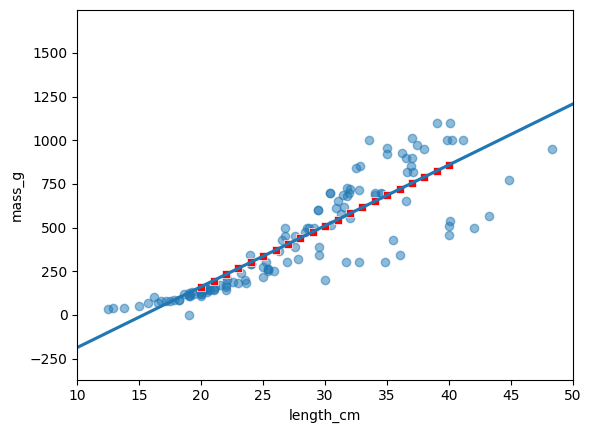

In [158]:
 fig, ax = plt.subplots()
sns.regplot(x="length_cm",y="mass_g",data=df_fish,ci=None,scatter_kws={'alpha': 0.5})
sns.scatterplot(x="length_cm",y="mass_g",data=explanatory_data,color="red",marker="s",)
ax.set_xlim(10, 50)

# Extrapolating 
- In linear regression modeling , we use extrapolation , because we can estimate   unseen data. 
- interpolation corresponds to  to estimating known values within a range.

let's predict the house prices using the taiwan real estate dataset 

In [164]:
mdl_price_vs_conv = sm.ols("price_twd_msq~n_convenience",data=df_taiwan).fit()
# Create explanatory_data 
explanatory_data3 = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data3)

# Create prediction_data
prediction_data = explanatory_data3.assign(
    price_twd_msq = price_twd_msq)

# Print the result
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


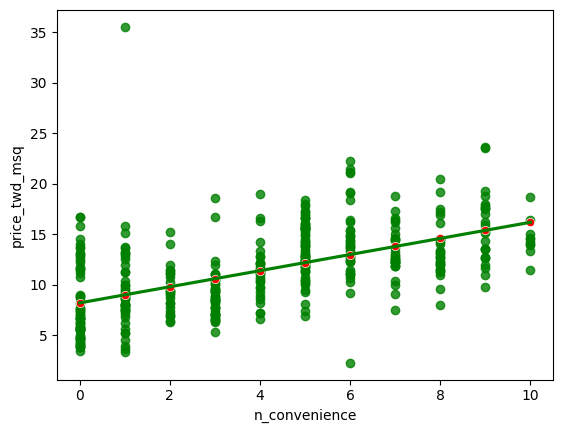

In [166]:
# Create a new figure, fig
fig = plt.Figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=df_taiwan,
            ci=None,color="green")
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
            y="price_twd_msq",
            data=prediction_data,color="red")

# Show the layered plot
plt.show()

# Impossible situations 

- **Linear models don't know what is possible or not in real life.** That means that they can give you predictions that don't make any sense when applied to your data. You need to understand what your data means in order to determine whether a prediction is nonsense or not.

- Using the taiwan dataset , if we try to predict the price using impossible number of convenience like (-1,2.5)  ,surely the model is going to extrapolate these values 

In [167]:
impossible = pd.DataFrame({"n_convenience":[-1,2.5]})
mdl_price_vs_conv.predict(impossible) 


0     7.426158
1    10.219437
dtype: float64

- This doesn't make sense 

# The model object (ols)
 - This model contains a lot of informations to explore , such as parameters of the model , fitted values .. 


- **.fittedvalues** attribute  are values predicted from the known range of values on the data . this is a shortcut for taking the predictions of the  train data . 
- **.resid** attribute  , which gives us the diffrence between response values and the predicted response values <br>
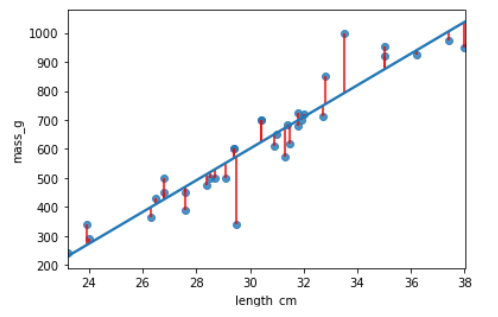<br>
 - The residuals are the redlines 
 - .summary() method shows the details of the model . <br>
 - First part of the summary : metrics on the performance of the model .
 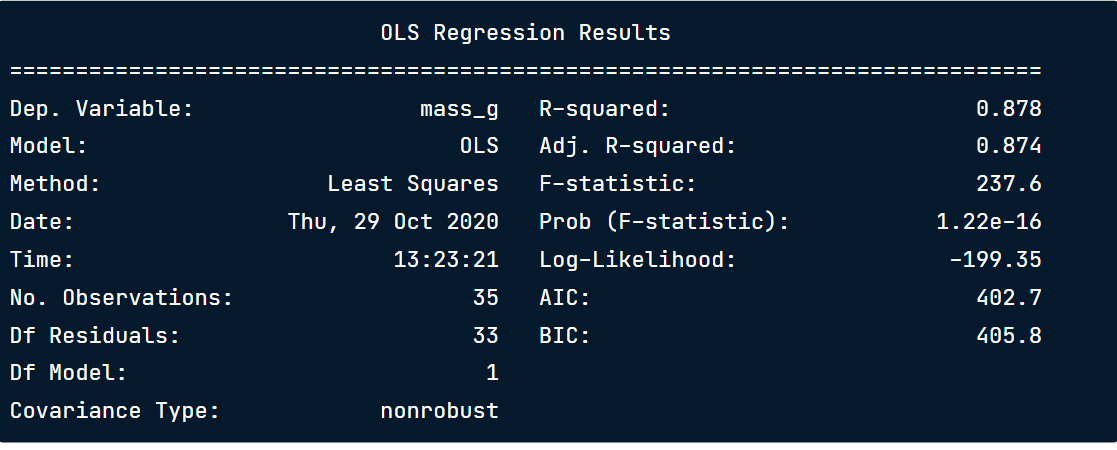<br>
 - Second part :details of the coefficients <br>
 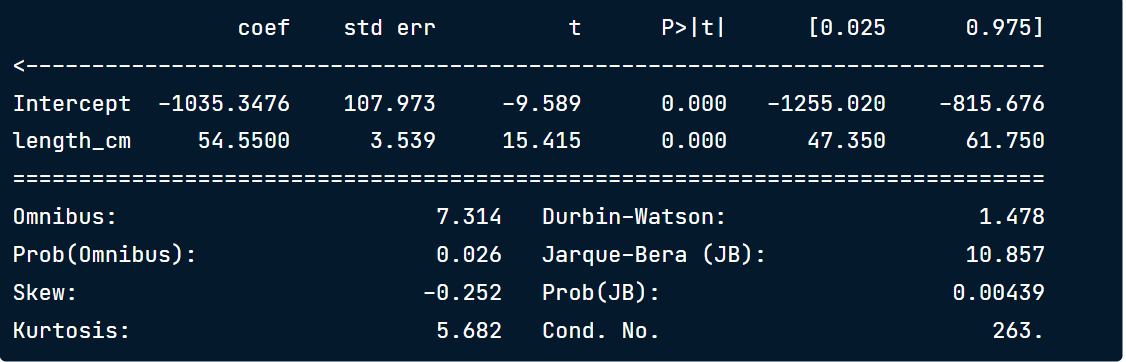 

- Real_data = predicted_data+resid<br> 
- There is many reasons why the models contains residuals : 
  - First the models  is bad isn't capturong the pattern in the data 
  - Second the model contain randomness , this will lead to extreme values , and the models shouldn't capture that . 
  
### That's why in regression we talk about Regression to the mean : 
       - EXTREME cases will look more like average cases 
  


In [189]:

df_father = pd.read_csv("Pearson.txt",delimiter="\t")

# Check the first 5 rows of the data
print(df_father.head())

   Father   Son
0    65.0  59.8
1    63.3  63.2
2    65.0  63.3
3    65.8  62.8
4    61.1  64.3


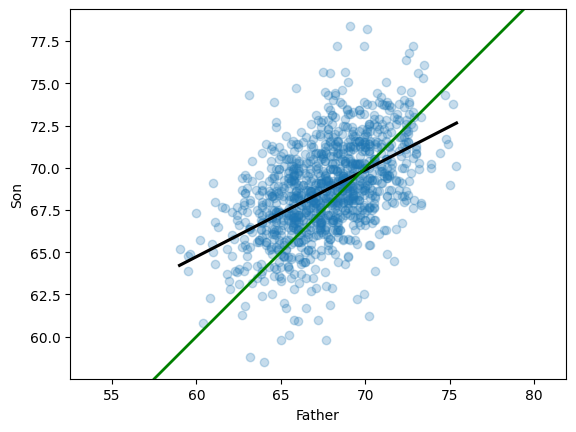

In [194]:
fig = plt.figure()
sns.regplot(x="Father",y="Son",data=df_father,ci=None,scatter_kws={"alpha":0.25},line_kws={'color': 'black'})
plt.axline(xy1=(60,60),slope=1,linewidth=2,color="green")
plt.axis("equal")
plt.show()
#Do tall fathers have tall sons  ?

- For very short fathers their sons are taller than them  on average . 
- conversly for taller fathers , their sons will loook smaller than them on average


In [196]:
mdl = sm.ols("Son~Father",data=df_father).fit()
print(mdl.params)

Intercept    33.892801
Father        0.514006
dtype: float64


In [203]:
#time to make predictions 
mdl.predict(pd.DataFrame({"Father":[75]}))


0    72.443244
dtype: float64

In [204]:
#For a taller father we predict that his son will be shorter than him , without taking on consideration  extreme values , but here we use the general trend and behavious of data
#same thing will be applied for shorter fathers
mdl.predict(pd.DataFrame({"Father":[50]}))

0    59.593096
dtype: float64

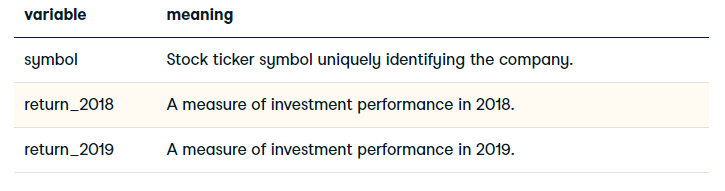<br>
- A naive prediction might be that the return of investement in 2018 will be the same as the return in 2019 .
- But the regression lines follows always the general behaviour of data that what we call regression to the mean 

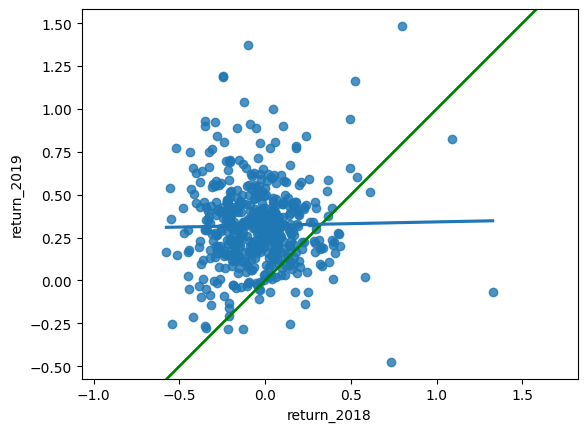

In [207]:
# Create a new figure, fig

sp500_yearly_returns = pd.read_csv("sp500_yearly_returns.csv")

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x="return_2018",y="return_2019",data=sp500_yearly_returns,ci=None)

# Set the axes so that the distances along the x and y axes look the same
plt.axis("equal")

# Show the plot
plt.show()

# Transforming variables
- Sometimes the relationship between response and explanatory variable may not be linear , So we need to transform the explanatory variable or the response , or both of them so as to have a linear relationship .
- Square roots  are a common  transformation when the data is right squewed .

- Right squewed data : <br>
       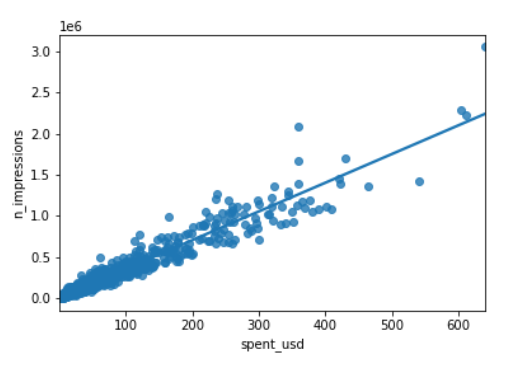

- One thing we need to take care of is applying transformations to test data . and reverting them back for comparison

In [275]:
ad_conversion = pd.read_csv("ad_conversion.csv")

<AxesSubplot: xlabel='n_impressions', ylabel='n_clicks'>

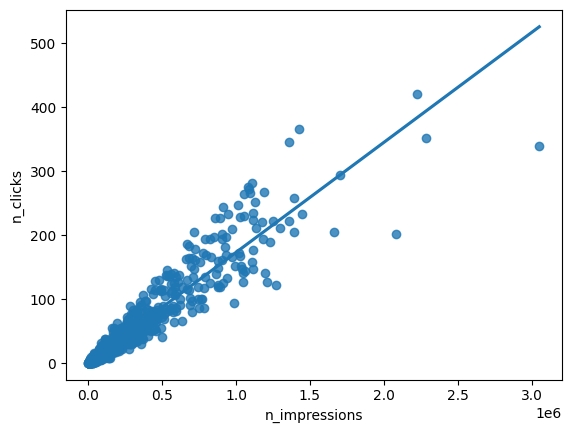

In [276]:
sns.regplot(x="n_impressions"  ,y = "n_clicks" ,data=ad_conversion,ci=None)

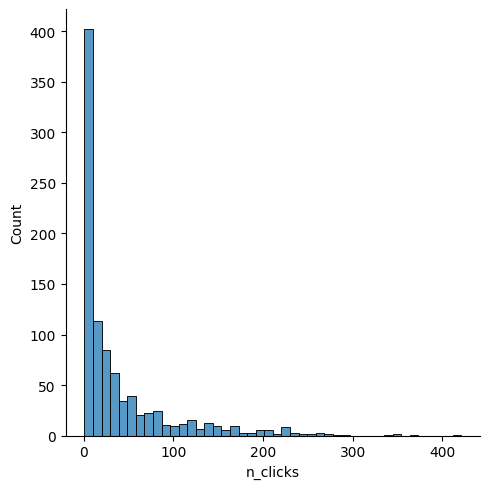

In [277]:

sns.displot(x="n_clicks" ,data=ad_conversion)  

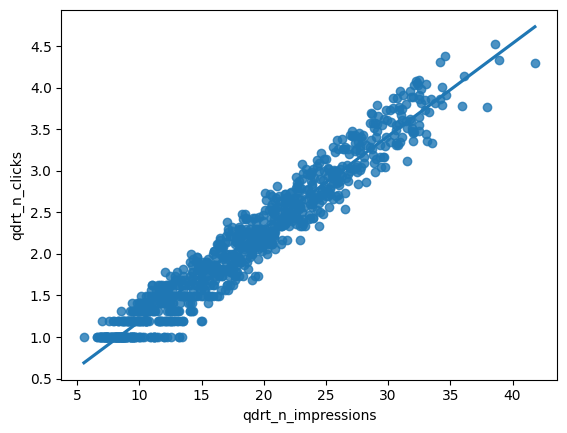

In [278]:

#As you can see the data is skewed to the right let's transform it 

# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

plt.figure()

# Plot using the transformed variables
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)
plt.show()

<AxesSubplot: xlabel='sqrt_n_impressions', ylabel='sqrt_n_clicks'>

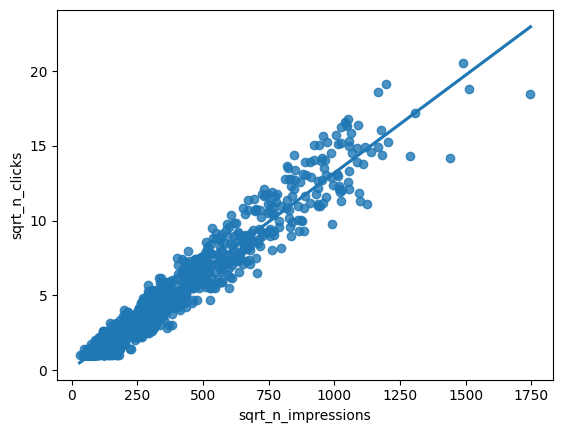

In [274]:
#next we wanna know how many people click on the advert after seeing it 

In [284]:
#The overlapping points of data are reduced using this technique so we managed to reduce skewness in the data 
#Now let's create a model

mdl_click_vs_impression = sm.ols("qdrt_n_clicks~qdrt_n_impressions",data=ad_conversion).fit()

In [287]:


explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data["qdrt_n_impressions"]))

# Print the result
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


### Back transformation to interpret the results

In [288]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"]**4
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks    n_clicks
0            0.000000            0.0       0.071748    0.000026
1           26.591479       500000.0       3.037576   85.135121
2           31.622777      1000000.0       3.598732  167.725102
3           34.996355      1500000.0       3.974998  249.659131
4           37.606031      2000000.0       4.266063  331.214159
5           39.763536      2500000.0       4.506696  412.508546
6           41.617915      3000000.0       4.713520  493.607180


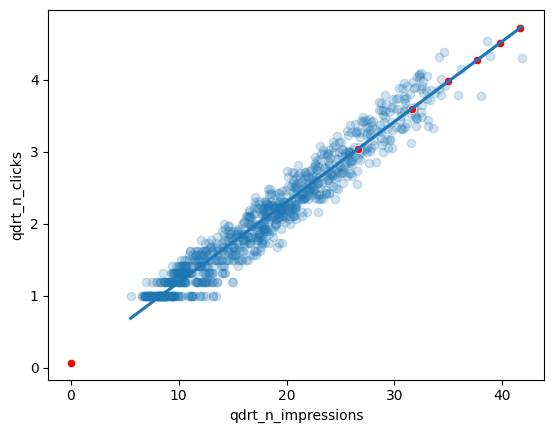

In [292]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion,scatter_kws={"alpha":0.2},ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="qdrt_n_impressions",y="qdrt_n_clicks",data=prediction_dat    a, color="red")
plt.show()

# Quantifying model fit

- we need to know if the predictions from our model are nonsense or not .<br>
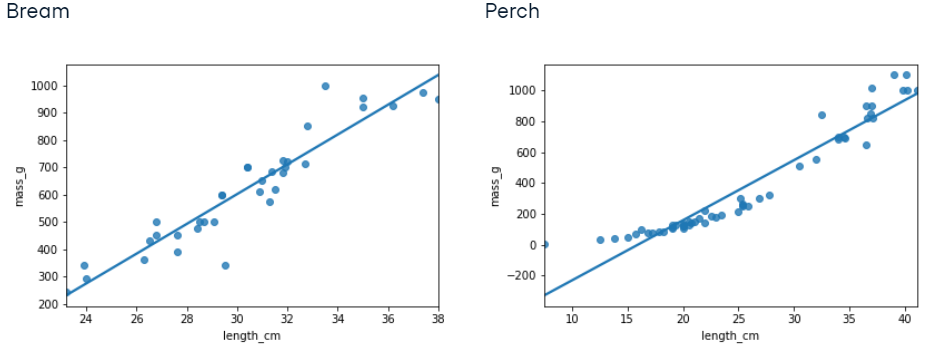<br>
- it would be useful to quantify how strong a linear relationship is :
- Coefficient of determination "Rsquared" : Proportion of the variance in the response variable that is predictable from explanatory variable .
- A score of 1 : the model is a perfect fit , a score of 0 : the model  is the worst possible fit 

- <font color="red" >What constitutes a good score ?</font>
  - Depends on your dataset ,as an example , a score of 0.5 on a psychological experiment may be exceptionnally high , because humans are hard to predict .
     - But for some datasets a score of 0.9 may be a poor fit .

- The coefficient of determination is simmply the correlation between explanatory data , and the response variable in simple linear regression. 

- Residual Standard Error(RSE) :
    - a "typical" difference  between a  prediction  and an observed  response 
    - It has the same unit as the response variable    
    - MSE=RSE**2 ,less commmonly used
    - The summary method doesn't contain rse , but "mse_resid"
    <br>

    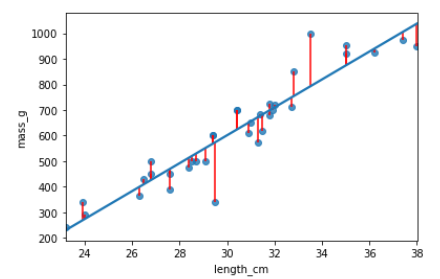                         

In [293]:
mdl_click_vs_impression.rsquared

0.9445272817143905

The number of impressions explains 94% of the variability in the number of clicks.

In [294]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

RSE of original model:  0.19690640896875722


- The typical difference between observed number of clicks and predicted number of clicks is 0.19

# Assessing the fit of a model 

- if a linear regression model is a good fit then the residuals are approximately normally distributed with a mean of 0 .
### Residuals vs fitted<br>
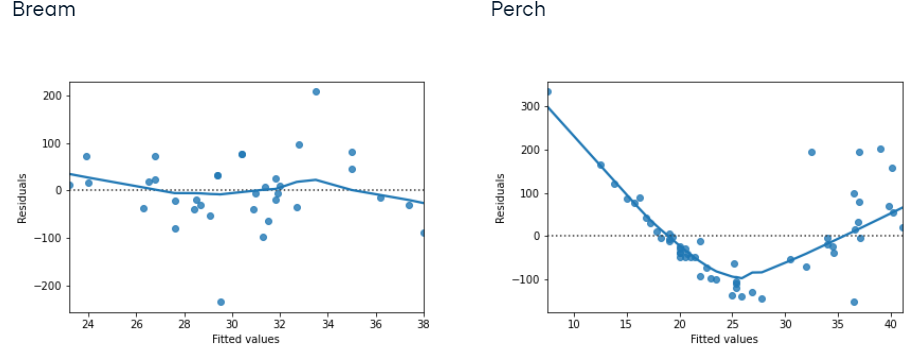
<br>
-lowess curve(blue line) : smooth curve following the data, not useful for making predictions but useful for visualizing trends
- If the residuals are normally distributed with mean 0 then the lowess curve should approximate the line resid=0<br>

### QQ plot : 
 - Shows if the data is normally distributed .
 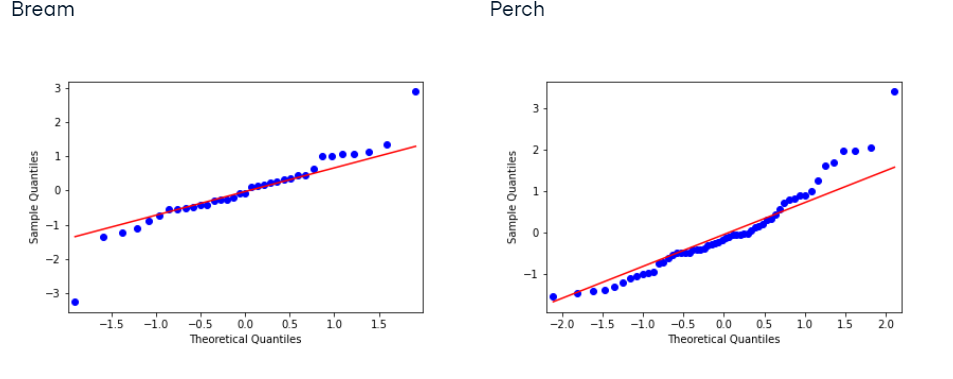 <br>
- Here the perch dataset doesn't track the line as closely , the model is particularly a poor fit for long lengths perchs .

### Scale location plot :
- Shows the square root of the standardized residuals  versus the fitted values . 
- Shows if the residuals gets bigger or smaller .
- If there is a trend in data then there is a poor fit <br>
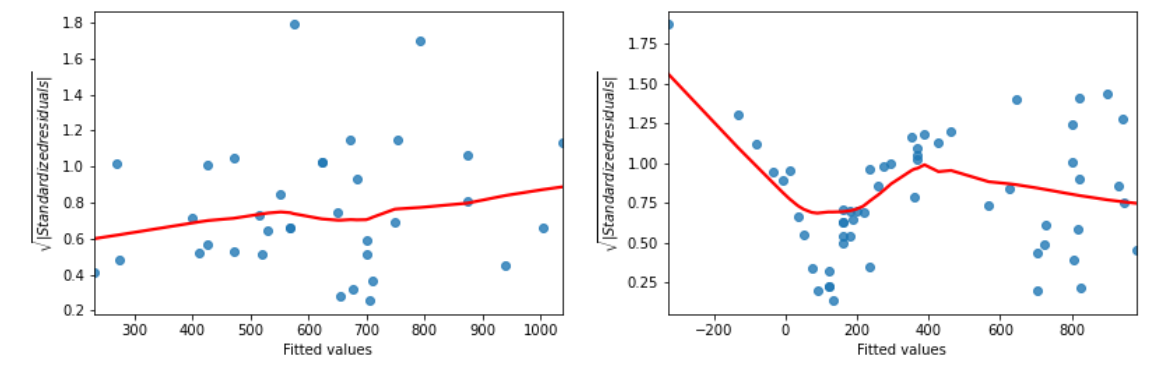

Text(0, 0.5, 'residuals')

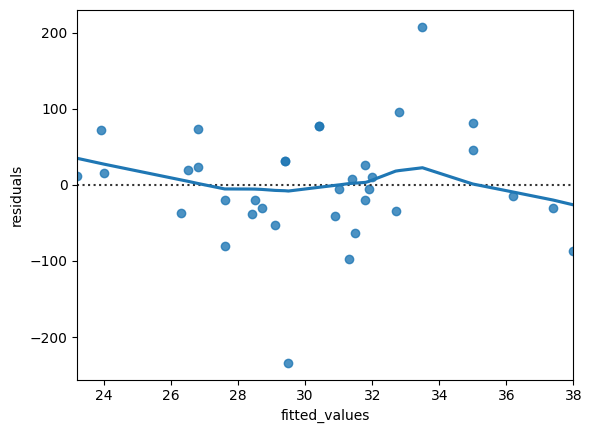

In [302]:
bream = df_fish[df_fish["species"]=="Bream"]
mdl_bream = sm.ols("length_cm~mass_g",data=bream).fit()
 #residual plot 
sns.residplot(x="length_cm",y="mass_g",data=bream,lowess=True)
plt.xlabel("fitted_values")
plt.ylabel("residuals")


## QQplot

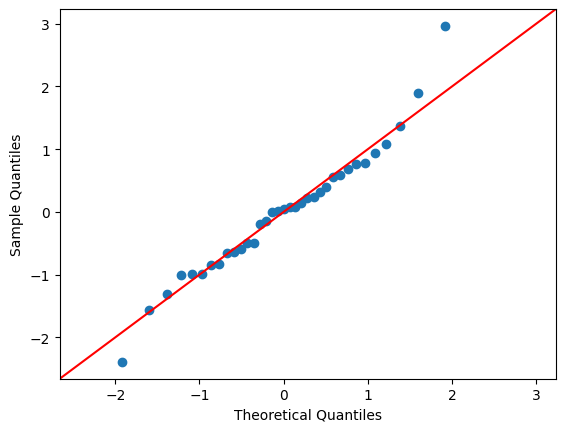

In [304]:
from statsmodels.api import qqplot
qqplot(data=mdl_bream.resid,fit=True,line="45")
plt.show()
##This will compare the data quantiles to the normal distribution 

## Scale location plot

Text(0, 0.5, 'Sqrt of abs values  of standardized residuals')

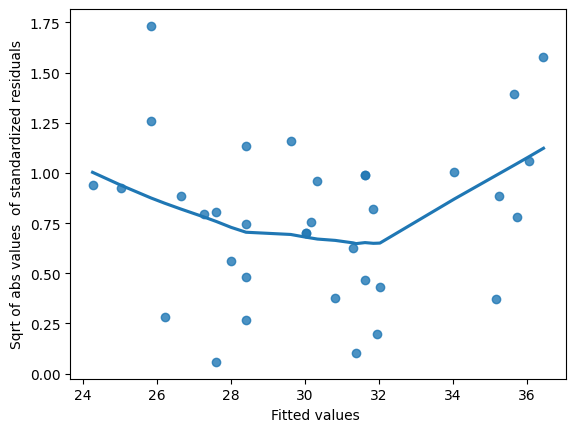

In [306]:
model_norm_residuals_bream = mdl_bream.get_influence().resid_studentized_internal
model_norm_residuals_sqrt_abs_bream =np.sqrt(np.abs(model_norm_residuals_bream))
sns.regplot(x=mdl_bream.fittedvalues , y=model_norm_residuals_sqrt_abs_bream,ci=None,lowess=True)
plt.xlabel("Fitted values ")
plt.ylabel("Sqrt of abs values  of standardized residuals")

Problem of good fitness for transformed data and non transformed data .

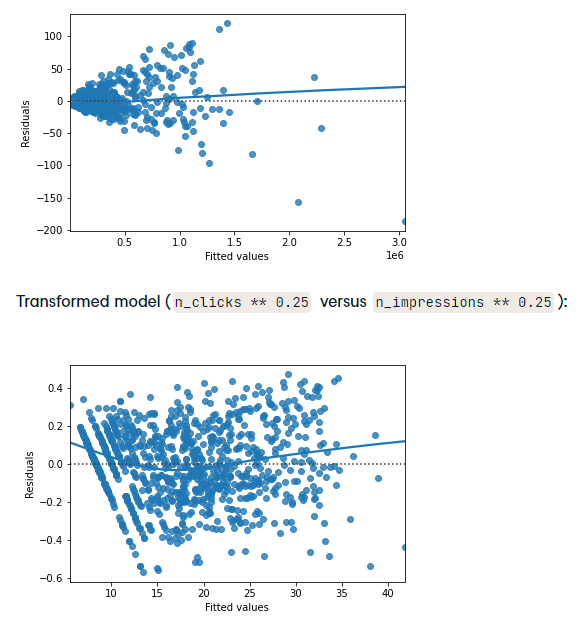


The residuals track the y=0 line more closely in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data.<br>

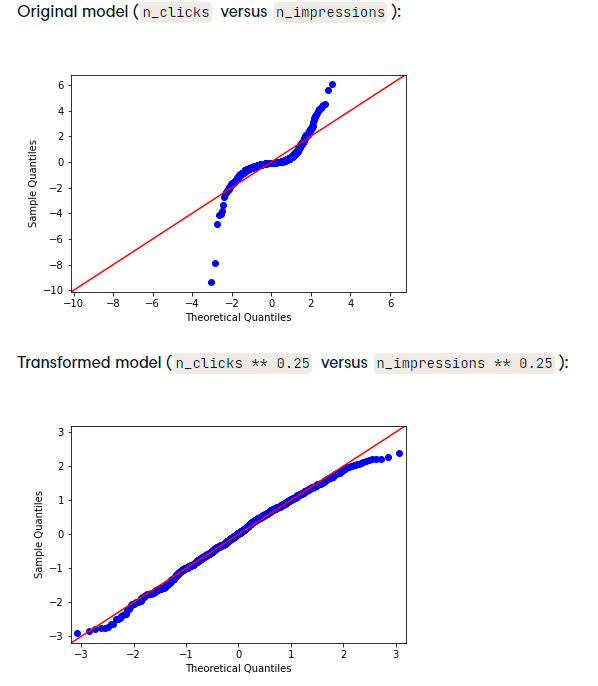<br>

The residuals track the "normality" line more closely in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data.

- Scale location <br>
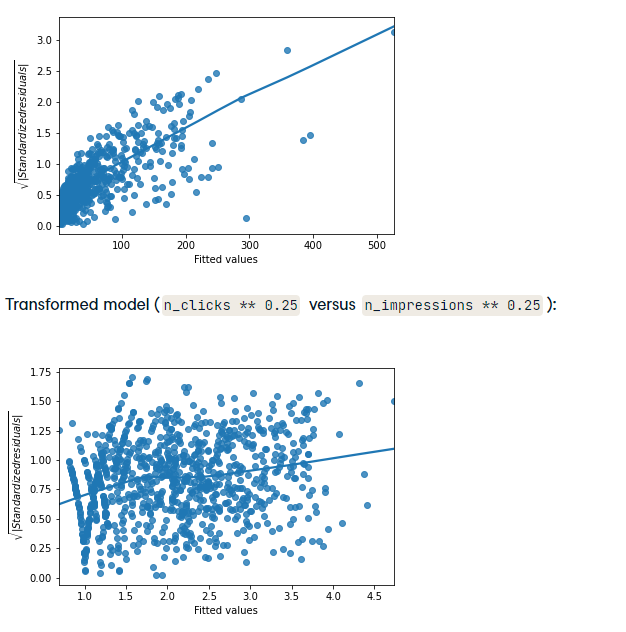<br>
The size of the standardized residuals is more consistent in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data., it means that the transformed model has smaller and more uniform deviations from the actual values. This suggests that the transformed model provides a better fit for the data and better captures the underlying relationships in the data.

# Outliers leverage and influence

- The detection of outliers should be done in explanatory variables and response 
- leverage quantifies how extreme  your explanatory variables values  are .
- with on explanatory variable you can find outliers by filtering .
- but with many explanatory variables the mathematics is complicated
- a related concept to leverage is influence , this measures how much the model will change if you won't run it with some extreme data points
- the influence of each observation is based on the size of residuals and leverage .<br>
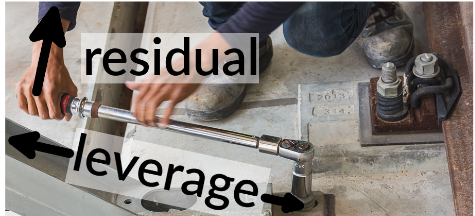<br>
- Observations far away from the trend line have high influence, because they have large residuals and are far away from other observations.


In [308]:
roach = df_fish[df_fish['species'] == "Roach"]
print(roach.head())

   species  mass_g  length_cm
35   Roach    40.0       12.9
36   Roach    69.0       16.5
37   Roach    78.0       17.5
38   Roach    87.0       18.2
39   Roach   120.0       18.6


' \n The "hue" argument is set to "extreme_l", which means that the points in the plot will be colored based on the values in the "extreme_l" column. The "style" argument is set to "extreme_m", which means that the style of the points will be based on the values in the "extreme_m" column.\n\n'

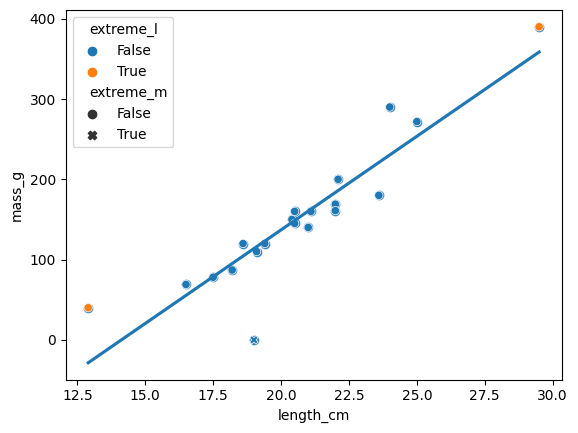

In [349]:
import warnings 

warnings.filterwarnings("ignore")

#Conditions of extreme values in both explanatory data and response variables 
roach["extreme_l"] = ((roach["length_cm"] < 15) |
                      (roach["length_cm"] > 26))

roach["extreme_m"] = roach["mass_g"] < 1

fig = plt.figure()

sns.regplot(x="length_cm",
            y="mass_g",
            data=roach,
            ci=None)
            
sns.scatterplot(x="length_cm",
                y="mass_g",
                hue="extreme_l",
                style="extreme_m",
                data=roach)
""" 
 The "hue" argument is set to "extreme_l", which means that the points in the plot will be colored based on 
 the values in the "extreme_l" column. The "style" argument is set to "extreme_m", 
 which means that the style of the points will be based on the values in the "extreme_m" column.

"""

In [350]:
#leverage 
mdl_roach = sm.ols("mass_g~length_cm",data=roach).fit()
summary_roach =mdl_roach.get_influence().summary_frame()

In [353]:
roach["leverage"] = summary_roach["hat_diag"]
#Historically speaking leverage is described in the so called hat matrix thet why it's stored in hat_diag column

print(roach.head())

   species  mass_g  length_cm  extreme_l  extreme_m  leverage
35   Roach    40.0       12.9       True      False  0.313729
36   Roach    69.0       16.5      False      False  0.125538
37   Roach    78.0       17.5      False      False  0.093487
38   Roach    87.0       18.2      False      False  0.076283
39   Roach   120.0       18.6      False      False  0.068387


In [356]:
#As you can se the observation 12.9 in length_cm has high leverage , which is an outlier for the mass column
#Recall  that influence is based on the size of residuals and  the leverage .
#for that we use cooks distance .
roach["cooks_dist"] = summary_roach["cooks_d"]


In [357]:
roach.head()

,species,mass_g,length_cm,extreme_l,extreme_m,leverage,cooks_dist
35,Roach,40.0,12.9,True,False,0.313729,1.074015
36,Roach,69.0,16.5,False,False,0.125538,0.010429
37,Roach,78.0,17.5,False,False,0.093487,0.000020
38,Roach,87.0,18.2,False,False,0.076283,0.001980
39,Roach,120.0,18.6,False,False,0.068387,0.006610


In [362]:
#let's see what are the most influential observations 

roach.sort_values(["cooks_dist"],ascending=False)

,species,mass_g,length_cm,extreme_l,extreme_m,leverage,cooks_dist
35,Roach,40.0,12.9,True,False,0.313729,1.074015
54,Roach,390.0,29.5,True,False,0.394740,0.365782
40,Roach,0.0,19.0,False,True,0.061897,0.311852
52,Roach,290.0,24.0,False,False,0.099488,0.150064
51,Roach,180.0,23.6,False,False,0.088391,0.061209
53,Roach,272.0,25.0,False,False,0.133386,0.020615
49,Roach,161.0,22.0,False,False,0.058072,0.011516
36,Roach,69.0,16.5,False,False,0.125538,0.010429
46,Roach,140.0,21.0,False,False,0.050554,0.007950
39,Roach,120.0,18.6,False,False,0.068387,0.006610


<AxesSubplot: xlabel='length_cm', ylabel='mass_g'>

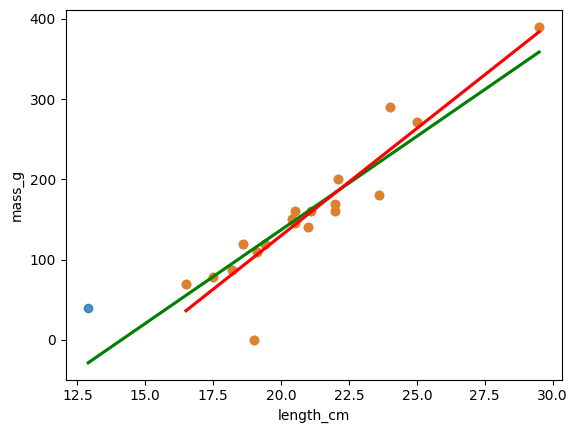

In [366]:
# the first three observations : 1)the fish is so short , 2)the fish is so long ; 3)roach with 0 mass
# Removing the most influential roach
roach_not_short = roach[roach["length_cm"] != 12.9]
sns.regplot(x="length_cm",
            y="mass_g",
            data=roach,
            ci=None,
            line_kws={"color": "green"})

sns.regplot(x="length_cm",
            y="mass_g",
            data=roach_not_short,
            ci=None,
            line_kws={"color": "red"})


In [367]:
#The slope of the line has completely changed just by removing a single data point